In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

rng = np.random.default_rng(2718)
np.random.seed(2718)

# Streaks

Streaks are really common. This iis one of those places where our intuitive notion of randomness and actual randomness collide. Imagine I asked you to try and randomly write a sequence of "W"'s and "L"'s to simulate a team's win-loss record. I could probably tell that it was fake. You might get the winning percentage correct, but your results would probably be less "streaky" than an actual sequence of winners. [Joseph Buchdal](https://www.football-data.co.uk/blog/Wald_Wolfowitz.php) actually did an experiment, and found that he couldn't create a win-loss record that would fool a statistical test called the Wald-Wolfowitz test. 

The frequency of streaks of wins and losses follows regular mathematical laws, ones our brains don't want to follow when asked to do the exercise. It seems natural to put stories to long streaks of wins or losses, because they don't seem "natural" to our brains.

To see this in action, let's generate some streaks.

In [16]:


def streaks(skill=.5, season_length=1000):
    # this will give us 1's and zeroes
    fake_season = pd.Series(np.random.rand(season_length) < skill).astype("float")
    as_win_loss = fake_season.replace(0.0, "L").replace(1.0, "W")
    as_str = "".join(as_win_loss)
    win_streaks = re.findall("(W{1,}+)", as_str)
    lose_streaks = re.findall("(L{1,}+)", as_str)

    win_lengths = pd.Series(map(len, win_streaks))
    lose_lengths = pd.Series(map(len, lose_streaks))

    return {
        'win_lengths': win_lengths.value_counts(),
        'lose_lengths': lose_lengths.value_counts(),
        'win_streaks': win_streaks,
        'lose_streaks': lose_streaks
        }




First off, a mathematical intuition check. Does the win rate affect the number of winning versus losing streaks? A team or a gambler that is good will have fewer losing streaks, right?

In one sense, yes, in another, no. There can be at most one more winning streak than losing streak no matter the win rate. Every time a winning streak ends, a losing streak begins, and vice versa.

But there will definitely be fewer streaks total as the win rate goes up. The winning streaks will be longer, the losing streaks shorter. There will be fewer opportunities for the winners to metaphorically pass the baton to the losers, and vice versa.

In [32]:
ok_bettor = streaks(skill=.5, season_length=10000000)

In [18]:
len(ok_bettor['win_streaks'])

2274207

In [19]:
len(ok_bettor['lose_streaks'])

2274206

In [33]:
lose_frequencies = ok_bettor['lose_lengths'] * ok_bettor['lose_lengths'].index /100000

In [34]:
win_frequencies = ok_bettor['win_lengths'] * ok_bettor['win_lengths'].index /100000

In [35]:
lose_frequencies.index = lose_frequencies.index * -1

In [36]:
win_and_lose = pd.concat([win_frequencies, lose_frequencies]).sort_index()

<Axes: >

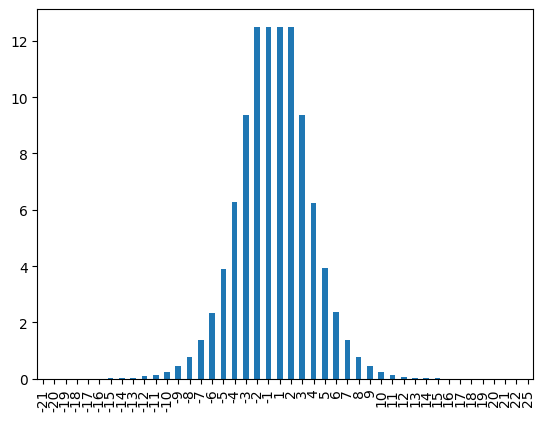

In [37]:
win_and_lose.plot.bar()

we can create the probability that you will be in a losing streak of a particular length at a particular time.

In [25]:
x['win_lengths'] * x['win_lengths'].index /10000

NameError: name 'x' is not defined

In [ ]:
strk = streaks(skill=.57, season_length=1000, iterations=1) 

In [ ]:
sum(strk * strk.index)

In [ ]:
6291/5992

In [ ]:
2 * 10 * 10 / (10 + 10)

In [ ]:
foo = pd.Series(map(len, win_streaks))

In [ ]:
foo.value_counts()

In [ ]:
from itertools import map

In [ ]:
type(fake_season)